In [4]:
import torch
from torch.utils.data import DataLoader
import numpy as np
from conut import MechanicalGraphene, MechanicalGrapheneLattice, HamiltonianType
from conut.data import WaveNumber, WaveNumberType
from tqdm import tqdm


# PyTorch setup
dev = 'cuda' if torch.cuda.is_available() else 'cpu'
params = {'batch_size': 8192,
          'shuffle': False,
          'num_workers': 4}

# Model parameters
κ = 55/120 * 10 * 2
α = 35 / 60
m = 0.115
l = 1.
Ω = 0.


# Setup Lattice
lattice = MechanicalGrapheneLattice(l, α, device=dev)

# Construct wavenumber dataset
wn = WaveNumber(WaveNumberType.XY, lattice, precision=1e-1)
wn_gkm = WaveNumber(WaveNumberType.GKM, lattice, precision=1e-1)
wn_generator = DataLoader(wn, **params)
wn_gkm_generator = DataLoader(wn_gkm, **params)

# Build mechanical graphene model
mg = MechanicalGraphene(κ=κ, m=m, α=α, lattice=lattice, h_type=HamiltonianType.Bulk, shape=wn.shape, Ω=Ω, perturbation=True).to(dev)
# mg_gkm = MechanicalGraphene(κ=κ, m=m, α=α, lattice=lattice, h_type=HamiltonianType.Bulk, shape=wn_gkm.shape, Ω=Ω, GKM=True, perturbation=False).to(dev)


for idcs_batch, ks_batch in wn_generator:
    idcs_batch, ks_batch = idcs_batch.to(dev), ks_batch.to(dev)
    mg(idcs_batch, ks_batch)


# for idcs_batch, ks_batch in wn_gkm_generator:
#     idcs_batch, ks_batch = idcs_batch.to(dev), ks_batch.to(dev)
#     mg_gkm(idcs_batch, ks_batch)

/Users/yoongun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/transforms.py:2052: ComplexWarning: Casting complex values to real discards the imaginary part
  self._mtx[0, 2] += tx
/Users/yoongun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/transforms.py:2053: ComplexWarning: Casting complex values to real discards the imaginary part
  self._mtx[1, 2] += ty
/Users/yoongun/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


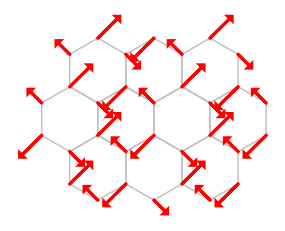

In [9]:
from conut.plot import Plot

plt = Plot(mg, wn, lattice)
# plt.dispersion3d(bands=[4, 5, 6, 7], save=False)
# plt.band(n=6, save=False)
plt.realspace(lattice.M.numpy(), 3, save=False)

# plt = Plot(mg_gkm, wn_gkm, lattice)
# plt.dispersion(bands=[4, 5, 6, 7], save=False)